# **IMDB Movies Data**

In [5]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 74.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 27.7MB/s]


In [3]:
import pandas as pd
import numpy as np

In [3]:
new_row = {'country': 'India', 'year': 2000,'population':13500000,
           'continent': "Asia", 'life_exp':37.08, 'gdp_cap':900.23}


pd.DataFrame([new_row])

,country,year,population,continent,life_exp,gdp_cap
0,India,2000,13500000,Asia,37.08,900.23


In [4]:
new_row = {'country': ['India'], 'year': [2000],'population':[13500000],
           'continent': ["Asia"], 'life_exp':[37.08], 'gdp_cap':[900.23]}


pd.DataFrame([new_row])

,country,year,population,continent,life_exp,gdp_cap
0,[India],[2000],[13500000],[Asia],[37.08],[900.23]


In [5]:
pd.DataFrame.from_dict(new_row)

,country,year,population,continent,life_exp,gdp_cap
0,India,2000,13500000,Asia,37.08,900.23


# **Starting with IMDB**

In [6]:
movies = pd.read_csv('movies.csv')
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [7]:
movies = pd.read_csv('movies.csv', index_col = 0)
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [8]:
directors = pd.read_csv('directors.csv',index_col=0)
directors.head()


,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [9]:
print("movies shape: ", movies.shape)
print("directors shape: ", directors.shape)

movies shape:  (1465, 11)
directors shape:  (2349, 3)


In [10]:
directors['director_name'].nunique()

2349

In [11]:
movies['director_id'].nunique()

199

In [12]:
# Let's check if all the directors in movies dataframe, are in directors dataframe

movies['director_id'].isin(directors['id'])

0       True
1       True
2       True
3       True
5       True
        ... 
4736    True
4743    True
4748    True
4749    True
4768    True
Name: director_id, Length: 1465, dtype: bool

In [13]:
(movies['director_id'].isin(directors['id'])).all()

True

In [14]:
np.all(movies['director_id'].isin(directors['id']))

True

In [9]:
# movie, directors


data = movies.merge(directors, how = 'left', left_on = 'director_id', right_on='id')

data.head()



,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male


In [16]:
data.drop(['id_y', 'director_id'], axis=1, inplace=True)

# **Apply Function**

In [17]:
# You can't send str to ML models, have to convert it to nos.

data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [18]:
def encode(data):
  if data == 'Male':
    return 0
  else:
    return 1

data['gender'].apply(encode)

0       0
1       0
2       0
3       0
4       0
       ..
1460    0
1461    0
1462    0
1463    0
1464    1
Name: gender, Length: 1465, dtype: int64

In [19]:
data['gender'] = data['gender'].apply(encode)
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,0
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,0
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,0
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,0
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,0


In [20]:
data[['revenue', 'budget']].head()

,revenue,budget
0,2787965087,237000000
1,961000000,300000000
2,880674609,245000000
3,1084939099,250000000
4,890871626,258000000


In [21]:
data[['revenue', 'budget']].apply(np.sum, axis=0)

revenue    209866997305
budget      70353617179
dtype: int64

In [22]:
data[['revenue', 'budget']].apply(np.sum, axis=1)

0       3024965087
1       1261000000
2       1125674609
3       1334939099
4       1148871626
           ...    
1460        321952
1461       3178130
1462             0
1463             0
1464       2260920
Length: 1465, dtype: int64

In [23]:
# create a function called prof, which will calculate profit for each movie, revenue - budget

def prof(data):
  return data['revenue'] - data['budget']

data['profit'] = data.apply(prof, axis=1)
data.head()


,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,0,2550965087
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,0,661000000
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,0,635674609
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,0,834939099
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,0,632871626


In [24]:
data[['budget', 'revenue']].head().apply(prof, axis=1)

0    2550965087
1     661000000
2     635674609
3     834939099
4     632871626
dtype: int64

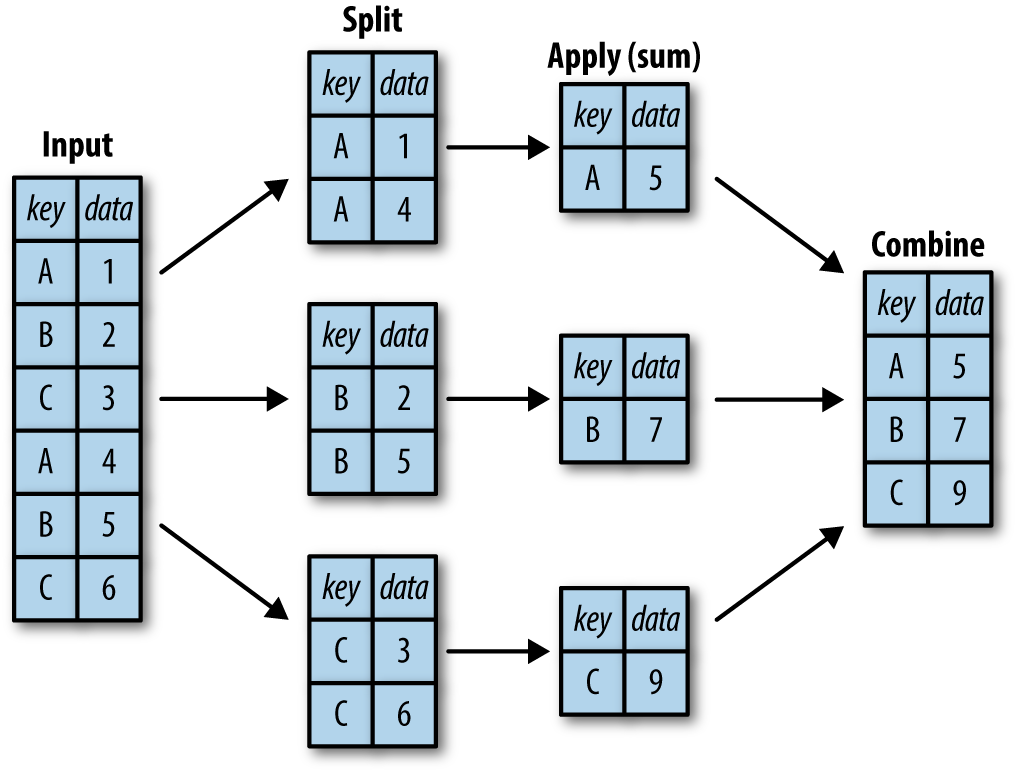

In [25]:
data.head(2)

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,0,2550965087
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,0,661000000


In [26]:
data.drop(['id_x'], axis=1, inplace=True)

In [27]:
data.groupby('director_name')

In [28]:
data.groupby('director_name').ngroups

199

In [29]:
data.groupby('director_name').groups

# returns all the group with explicit indexes

{'Adam McKay': [176, 323, 366, 505, 839, 916], 'Adam Shankman': [265, 300, 350, 404, 458, 843, 999, 1231], 'Alejandro González Iñárritu': [106, 749, 1015, 1034, 1077, 1405], 'Alex Proyas': [95, 159, 514, 671, 873], 'Alexander Payne': [793, 1006, 1101, 1211, 1281], 'Andrew Adamson': [11, 43, 328, 501, 947], 'Andrew Niccol': [533, 603, 701, 722, 1439], 'Andrzej Bartkowiak': [349, 549, 754, 911, 924], 'Andy Fickman': [517, 681, 909, 926, 973, 1023], 'Andy Tennant': [314, 320, 464, 593, 676, 885], 'Ang Lee': [99, 134, 748, 840, 1089, 1110, 1132, 1184], 'Anne Fletcher': [610, 650, 736, 789, 1206], 'Antoine Fuqua': [310, 338, 424, 467, 576, 808, 818, 1105], 'Atom Egoyan': [946, 1128, 1164, 1194, 1347, 1416], 'Barry Levinson': [313, 319, 471, 594, 878, 898, 1013, 1037, 1082, 1143, 1185, 1345, 1378], 'Barry Sonnenfeld': [13, 48, 90, 205, 591, 778, 783], 'Ben Stiller': [209, 212, 547, 562, 850], 'Bill Condon': [102, 307, 902, 1233, 1381], 'Bobby Farrelly': [352, 356, 481, 498, 624, 630, 654, 80

In [30]:
data.groupby('director_name').get_group('Alexander Payne')

,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit
793,30000000,19,105834556,About Schmidt,6.7,362,2002,Dec,Friday,Alexander Payne,1,75834556
1006,20000000,40,177243185,The Descendants,6.7,934,2011,Sep,Friday,Alexander Payne,1,157243185
1101,16000000,23,109502303,Sideways,6.9,478,2004,Oct,Friday,Alexander Payne,1,93502303
1211,12000000,29,17654912,Nebraska,7.4,636,2013,Sep,Saturday,Alexander Payne,1,5654912
1281,0,13,0,Election,6.7,270,1999,Apr,Friday,Alexander Payne,1,0


In [31]:
  # I want to find out unique titles for each director

data.groupby('director_name')['title'].count()

director_name
Adam McKay                      6
Adam Shankman                   8
Alejandro González Iñárritu     6
Alex Proyas                     5
Alexander Payne                 5
                               ..
Wes Craven                     10
Wolfgang Petersen               7
Woody Allen                    18
Zack Snyder                     7
Zhang Yimou                     6
Name: title, Length: 199, dtype: int64

In [32]:
# average profit for each director

data.groupby('director_name')['profit'].mean()

director_name
Adam McKay                     8.626274e+07
Adam Shankman                  6.082035e+07
Alejandro González Iñárritu    1.129966e+08
Alex Proyas                    8.451249e+07
Alexander Payne                6.644699e+07
                                   ...     
Wes Craven                     5.309943e+07
Wolfgang Petersen              1.405737e+08
Woody Allen                    2.271702e+07
Zack Snyder                    2.308853e+08
Zhang Yimou                    4.009495e+07
Name: profit, Length: 199, dtype: float64

In [33]:
data.groupby('director_name')['profit'].max()

director_name
Adam McKay                     123649015
Adam Shankman                  132874442
Alejandro González Iñárritu    397950503
Alex Proyas                    227234916
Alexander Payne                157243185
                                 ...    
Wes Craven                     159046663
Wolfgang Petersen              322409852
Woody Allen                    121119219
Zack Snyder                    623260194
Zhang Yimou                    146394432
Name: profit, Length: 199, dtype: int64

In [34]:
# Interested in first year, and last year for each director

data.groupby('director_name')['year'].min()

director_name
Adam McKay                     2004
Adam Shankman                  2001
Alejandro González Iñárritu    2000
Alex Proyas                    1994
Alexander Payne                1999
                               ... 
Wes Craven                     1984
Wolfgang Petersen              1981
Woody Allen                    1977
Zack Snyder                    2004
Zhang Yimou                    2002
Name: year, Length: 199, dtype: int64

In [35]:
data.groupby('director_name')['year'].max()

director_name
Adam McKay                     2015
Adam Shankman                  2012
Alejandro González Iñárritu    2015
Alex Proyas                    2016
Alexander Payne                2013
                               ... 
Wes Craven                     2011
Wolfgang Petersen              2006
Woody Allen                    2013
Zack Snyder                    2016
Zhang Yimou                    2014
Name: year, Length: 199, dtype: int64

In [36]:
data.groupby('director_name')['year'].aggregate(['min', 'max'])

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


In [37]:
data.groupby('director_name')['year'].aggregate(['min', 'max']).reset_index()

,director_name,min,max
0,Adam McKay,2004,2015
1,Adam Shankman,2001,2012
2,Alejandro González Iñárritu,2000,2015
3,Alex Proyas,1994,2016
4,Alexander Payne,1999,2013
...,...,...,...
194,Wes Craven,1984,2011
195,Wolfgang Petersen,1981,2006
196,Woody Allen,1977,2013
197,Zack Snyder,2004,2016


In [38]:


# in group by, if you don't specify any columns, it will take all the columns



In [39]:
data.groupby('director_name').mean()

TypeError: Could not convert The Other GuysTalladega Nights: The Ballad of Ricky BobbyStep BrothersAnchorman 2: The Legend ContinuesThe Big ShortAnchorman: The Legend of Ron Burgundy to numeric

In [40]:
# Filter details of movies, where they've a high budget director
#  (it means their budget for any of the film is more than 100M)


# first I want to identify, directors where their max-budget is more than 100M
data_df=data.groupby('director_name')['budget'].max().reset_index()
data_df

,director_name,budget
0,Adam McKay,100000000
1,Adam Shankman,80000000
2,Alejandro González Iñárritu,135000000
3,Alex Proyas,140000000
4,Alexander Payne,30000000
...,...,...
194,Wes Craven,40000000
195,Wolfgang Petersen,175000000
196,Woody Allen,30000000
197,Zack Snyder,250000000


In [42]:
# let's create a mask
data_df['budget']>=100

0      True
1      True
2      True
3      True
4      True
       ... 
194    True
195    True
196    True
197    True
198    True
Name: budget, Length: 199, dtype: bool

In [44]:
data_df.loc[data_df['budget']>=100,'director_name']

0                       Adam McKay
1                    Adam Shankman
2      Alejandro González Iñárritu
3                      Alex Proyas
4                  Alexander Payne
                  ...             
194                     Wes Craven
195              Wolfgang Petersen
196                    Woody Allen
197                    Zack Snyder
198                    Zhang Yimou
Name: director_name, Length: 199, dtype: object

In [47]:
names = data_df.loc[data_df['budget'] >= 100, 'director_name']

In [50]:
# select all the rows, where director name is in the names variable
data_df.loc[data_df['director_name'].isin(names)]

,director_name,budget
0,Adam McKay,100000000
1,Adam Shankman,80000000
2,Alejandro González Iñárritu,135000000
3,Alex Proyas,140000000
4,Alexander Payne,30000000
...,...,...
194,Wes Craven,40000000
195,Wolfgang Petersen,175000000
196,Woody Allen,30000000
197,Zack Snyder,250000000


In [52]:
data_df.groupby('director_name').filter(lambda x:x['budget'].max()>100)

,director_name,budget
0,Adam McKay,100000000
1,Adam Shankman,80000000
2,Alejandro González Iñárritu,135000000
3,Alex Proyas,140000000
4,Alexander Payne,30000000
...,...,...
194,Wes Craven,40000000
195,Wolfgang Petersen,175000000
196,Woody Allen,30000000
197,Zack Snyder,250000000


In [55]:
data.groupby('director_name').get_group('Alexander Payne')['revenue'].mean()

82046991.2

In [59]:
def func(x):
  x['risky']=x['budget']-x['revenue'].mean()>=0
  return x

data.groupby('director_name').apply(func)

budget  popularity    revenue  \
director_name                                          
Adam McKay    176   100000000          24  170432927   
              323    72500000          12  162966177   
              366    65000000          22  128107642   
              505    50000000          38  173649015   
              839    28000000          57  133346506   
...                       ...         ...        ...   
Zhang Yimou   590         110           9          0   
              604    31000000          23  177394432   
              1217          0          21   92863945   
              1223          0           1          0   
              1389          0           6          0   

                                                          title  vote_average  \
director_name                                                                   
Adam McKay    176                                The Other Guys           6.1   
              323   Talladega Nights: The Ballad of Ricky Bobby           6.2   
              366                                 Step Brothers           6.5   
              505             Anchorman 2: The Legend Continues           6.0   
              839                                 The Big Short           7.3   
...                                                         ...           ...   
Zhang Yimou   590                    Curse of the Golden Flower           6.6   
              604                                          Hero           7.2   
              1217                      House of Flying Daggers           7.1   
              1223             A Woman, a Gun and a Noodle Shop           4.8   
              1389                                  Coming Home           6.9   

                    vote_count  year month        day director_name  gender  \
director_name                                                                 
Adam McKay    176         1383  2010   Aug     Friday    Adam McKay       0   
              323          491  2006   Aug     Friday    Adam McKay       0   
              366         1062  2008   Jul     Friday    Adam McKay       0   
              505          923  2013   Dec  Wednesday    Adam McKay       0   
              839         2607  2015   Dec     Friday    Adam McKay       0   
...                        ...   ...   ...        ...           ...     ...   
Zhang Yimou   590          203  2006   Dec   Thursday   Zhang Yimou       0   
              604          635  2002   Dec   Thursday   Zhang Yimou       0   
              1217         439  2004   May  Wednesday   Zhang Yimou       0   
              1223          13  2009   Dec     Friday   Zhang Yimou       0   
              1389          49  2014   May     Friday   Zhang Yimou       0   

                       profit  risky  
director_name                         
Adam McKay    176    70432927  False  
              323    90466177  False  
              366    63107642  False  
              505   123649015  False  
              839   105346506  False  
...                       ...    ...  
Zhang Yimou   590        -110  False  
              604   146394432  False  
              1217   92863945  False  
              1223          0  False  
              1389          0  False  

[1465 rows x 13 columns]

In [60]:
# task is to create a column, called "RISKY", a movie is risky
# if the average budget of the director is more than avg revenue

def func(x):
  # if x['budget'] - x['revenue'].mean() >= 0:
  #   x['risky'] = True
  # else:
  #   x['risky'] = False
  x['risky'] = x['budget'] - x['revenue'].mean() >= 0
  return x


data.groupby('director_name', group_keys=False).apply(func)

,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit,risky
0,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,0,2550965087,False
1,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,0,661000000,False
2,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,0,635674609,False
3,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,0,834939099,False
4,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,0,632871626,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0,3,321952,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,0,321952,False
1461,27000,19,3151130,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,0,3124130,False
1462,0,7,0,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,0,0,False
1463,0,3,0,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,0,0,False


In [61]:
# such that it identifies as the costliest_movie, which is True if the budget
# for that movie is max, for other movies, for that director it should be False

In [65]:
def func_cost(x):
  x['costliest_movie']=x['budget']==x['budget'].max()
  return x

data.groupby('director_name',group_keys=False).apply(func_cost)

,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit,costliest_movie
0,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,0,2550965087,True
1,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,0,661000000,True
2,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,0,635674609,True
3,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,0,834939099,True
4,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,0,632871626,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0,3,321952,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,0,321952,False
1461,27000,19,3151130,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,0,3124130,False
1462,0,7,0,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,0,0,False
1463,0,3,0,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,0,0,False


In [10]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male


In [11]:
def is_null(x):
   return sum(x.isnull())
data.apply(is_null, axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1460    0
1461    0
1462    0
1463    0
1464    1
Length: 1465, dtype: int64

In [12]:
data.tail()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,4809,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,5369,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,5148,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,5535,Male
1464,48395,220000,14,2040920,El Mariachi,6.6,238,5097,1992,Sep,Friday,Robert Rodriguez,5097,NaN


In [13]:
import pandas as pd

data = {
    'name': ['Jim', 'Clarke', 'Kent', 'Mark'],
    'username': ['itsjimhere', 'clark002', 'itskentment', 'markyoumustknow'],
    'userid': [20, 10, 86, 21]
}

df = pd.DataFrame(data)

In [20]:
def check(name,username):
    return name.lower() in username

r=df[(df.apply(lambda x:check(x['name'],x['username']), axis=0))]['userid']
r

KeyError: 'name'